# <span style="color: #336699;"><strong>JOB APPLICANTS CASE STUDY</strong></span>


# <span style="color: #336699;">1. Introduction</span>

The dataset titled "Employability Classification of Over 70,000 Job Applicants" contains a comprehensive collection of information regarding job applicants and their respective employability scores. The dataset has been compiled to assist organizations and recruiters in evaluating the suitability of candidates for various employment opportunities. By utilizing machine learning techniques, this dataset aims to provide valuable insights into the factors influencing employability and enhance the efficiency of the hiring process.

# <span style="color: #336699;">2. DataSet fields description</span>

* Age: age of the applicant, >35 years old or <35 years old (categorical)
* EdLevel: education level of the applicant (Undergraduate, Master, PhD…) (categorical)
* Employement: if the applicante is currently employed or not (categorical)
* Gender: gender of the applicant, (Man, Woman, or NonBinary) (categorical)
* MentalHelat: whether the applicant has some mental Health condition (categorical)
* MainBranch: whether the applicant is a profesional developer (categorical)
* YearsCode: how long the applicant has been coding (integer)
* YearsCodePro: how long the applicant has been coding in a professional context, (integer)
* Country: Country of the applicant (categorical)
* PreviousSalary: the applicant's previous job salary (float)
* <span style="color: #336699;"><strong>HaveWorkedWith</strong></span>: computer skills known by the applicant (string)
* ComputerSkills: number of computer skills known by the applicant (integer)
* Employed: target variable, whether the applicant has been hired (categorical)

# <span style="color: #336699;">3. Previous Study</span>


### <span style="color: #336699;">3.1 Summary</span>

In a previous study, the analysis was done in 4 differents steps:

1) <span style="color: #336699;"><strong>EDA</strong></span> - An exploratory Data Analysis was done, usually being the first step of any analysis.

2) <span style="color: #336699;"><strong>Decision Tree Model for Classification</strong></span> -  A type of supervised machine learning algorithm used for both classification and regression tasks. In this case, it was a classification task and the goal was to predict the binary target variable "Employed" using the features available
3) <span style="color: #336699;"><strong>A Priori  Model for Association</strong></span>- A type of Unsupervised machine learning algorithm used for association rules learning. In this case the goal weas to understant which skill types are related, being on of the them the consequent and the remaining the
antecedents.	

For the EDA, were used some of the features and analysed with target variable except "HaveWorkedWith" because it seemed to not be suitable since it was a text feature - a list of skills.
For the remaining variables an EDA was done, including:

* Setting correct data types for categorical and numerical variable
* Graphical representations of all features alone and against targel variable "Employed" - boxplots and barplots mainly
* Correlation tests between all the numerical features to check wich ones were independent of each other to avoid multicollinearity and redundancy that could increase the variance of coefficient estimates, making a potencial model unstable and causing overfitting
* Correlation between numerical features and target variable -  point-biserial correlation coefficient
* Independency test between categorical features and target variable - Chi-Squared test
* Outliers Detection and NAs removal
* No need to balance the target Variable because it was already +/ 50/50 splitted by default

The conclusion was a strong association on the categorical variables with target variable and only one numerical variable correlated with target variable - ComputerSkills.

For the Decision trees model classification the usual data analysis and transformations was done, such:
* Feature encoding - ALl the categorical features with more than 2 classes were hot encoded - the classes were converted in binary columns and the binary features were converted to integer values but keeping the categorical attribution
* Train/Test data split with cross validation
* Feature selection - Before hyperparameter tuning techniques, a first feature selection was applied, testing a decision tree for all the features combinations and fitler the combination with the best Average score result.
* Hyperparameter tuning technique - in this case it was the RandomizedSearchCV instead of GridSearchCV because due to the size of the dataset, it was very computationally expensive. 
* After finding the "best" model, graphical representations were done for the decision tree itself and also the feature importance - It was overwhelming the importance of "Computer Skills" above the other features used in the model
* Regarding the Evaluation Metrics Accuracy, Precision, Recall and F1 Score, in both Training, Validation and test sets an average of 80% in each metric was obtained. The model seemed to be well implemented and based on the evaluation metrics, both under and overfitting could be discarded, with a reasonable good model performance. However, there colud be some room for improvement by doing other features transformations such in the not used feature "HaveWorkedWith".

For the Apriori Model, it was found some interestings insights regarding the association between skills. For instance, an applicant with experience in Java Script was likely to have also some skills in HTML/CSS, jQuery or Node.js, which makes sense due to the nature and goals of this type of languages.

### <span style="color: #336699;">3.2. Conclusion:</span>

After analysing both results, a new different kind of analysis emerged. Based on the method used in Apriori Model where the feature "HaveWorkedWith" was splitted in multiple binary columns, each one being each skill present in the orginal list in the feature "HaveWorkedWith", it started to make sense to follow a similar approach for a classification model study.

# <span style="color: #336699;">4. New Study</span>

The aim of this study is to do a deeper analyses on this dataset regarding jobs applicants where the goal is to predit the employability based on Applicants characteristics/Skills present in the feature <span style="color: #336699;"><strong>HaveWorkedWith</strong></span> (ex: 'C++;Python;Git;PostgreSQL')

In [906]:
## Download dataset from Kaggle
#import kagglehub
#
#dataset_path = "ayushtankha/70k-job-applicants-data-human-resource"
#!kaggle datasets download {dataset_path} -p /content/ --unzip
#
#https://www.kaggle.com/datasets/ayushtankha/70k-job-applicants-data-human-resource/data
#!pip install xgboost

## <span style="color: #336699;">4.1. Imports</span>

A python file was created to store all the needed imports and auxiliar functions such customized plots, tables, ...

In [71]:
%load_ext autoreload
%autoreload 2
import auxiliar_functions
from auxiliar_functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <span style="color: #336699;">4.2. Data import and cleanup </span>


In [362]:
# Read the file
path = "./data/stackoverflow_full.csv"
employmentData = pd.read_csv(path)
## Use column "Unnamed: 0" as ID for application
employmentData = employmentData.rename(columns={'Unnamed: 0': 'ID'})
# Number of rows
print("Number of rows:", len(employmentData),'\n')
# Display the number of nulls in each column
print("NaN values:\n")
print(employmentData.isnull().sum())
# Remove the rows with null values
employmentData = employmentData.dropna()
# Number of rows
print("\nNumber of rows after remove NaN values:", len(employmentData))
employmentData = employmentData[['Employed','HaveWorkedWith']]

Number of rows: 73462 

NaN values:

ID                 0
Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64

Number of rows after remove NaN values: 73399


## <span style="color: #336699;">4.3. Subset Visualization </span>


In [364]:
# Get the first 5 rows of the DataFrame
employmentData_head = employmentData.head(10)

create_table(employmentData_head, 
             title='Job Aplicants Data set - New Study', 
             width=1300, 
             height=500,
            columnwidth=[10, 60])

## <span style="color: #336699;">4.4. Sampling </span>
Since the data size is considerably big a sampling was done to use only 50% of the data. The remaining 50% can be used as a final validation of the predictive power of the model choosen.
Also, only "HaveWorkedWith will be considered as the feature to be tested with the target Variable "Employed"

In [657]:
random.seed(42)  #
employmentDataTrain = employmentData.sample(n=round(len(employmentData)*0.50))
X = employmentDataTrain.drop(['Employed'],axis=1)
y = employmentDataTrain['Employed']

employmentDataTest = employmentData.drop(employmentDataTrain.index)
X_testFinal = employmentDataTest.drop(['Employed'],axis=1)
y_testFinal = employmentDataTest['Employed']

## <span style="color: #336699;">4.5. Feature transformation </span>

There are some technics to transform a feature text like  <span style="color: #336699;"><strong>HaveWorkedWith</strong></span> (ex: 'C++;Python;Git;PostgreSQL') in multiple numerical or categorical features being each new feature on of the items in the text feature. 

In this case <span style="color: #336699;"><strong>HaveWorkedWith</strong></span> is a collection of skills. This collection is delimited by ';' and a split can be applied using this key.

For this purpose the technique applied was <span style="color: #336699;"><strong>TfidfVectorizer</strong></span>.

<span style="color: #336699;"><strong>TfidfVectorizer</strong></span> is a scikit-learn tool that converts raw text into TF-IDF feature matrices [Hastie2009].

#### Key Features:
- Combines CountVectorizer and TfidfTransformer functionalities [Geron2019]
- Customizable parameters (e.g., n-gram range, stop words)
- Builds vocabulary and computes IDF values
- Applies TF-IDF weighting to term frequencies

#### Common Uses:
- Document classification
- Text clustering
- Information retrieval

TfidfVectorizer uses the following main calculations:

### 1. Term Frequency (TF)
TF measures how frequently a term occurs in a document.

$TF(t,d) = \frac{\text{Number of times term t appears in document d}}{\text{Total number of terms in document d}}$

### 2. Inverse Document Frequency (IDF)
IDF measures how important a term is across the entire corpus.

$IDF(t) = \log\frac{\text{Total number of documents}}{\text{Number of documents with term t}}$

### 3. TF-IDF Score
The final TF-IDF score is the product of TF and IDF.

$TFIDF(t,d) = TF(t,d) \times IDF(t)$

### 4. Normalized TF-IDF (Optional)
Often, the TF-IDF vector is normalized to unit length.

$Normalized\_TFIDF = \frac{TFIDF}{\sqrt{\sum TFIDF^2}}$

### 5. Sublinear TF Scaling (Optional)
To prevent common terms from dominating, sublinear scaling can be applied:

$Sublinear\_TF = 1 + \log(TF)$ if $TF > 0$, else $0$

### 6. Smoothed IDF (Optional)
To avoid division by zero, smoothing can be applied:

$Smoothed\_IDF = \log\frac{\text{Total number of documents} + 1}{\text{Number of documents with term t} + 1} + 1$

#### These calculations transform raw text into numerical features, emphasizing important terms while de-emphasizing common ones across the document set.

Some addtional parametrizations were applied such:

### Custom Tokenizer
- Splits text on semicolons
- Strips whitespace
- Removes empty tokens
- Converts list-like text into individual tokens

### Stop Words: 'english'
- Removes standard English stop words
- Eliminates common, low-information words
- Reduces noise in feature representation
- Focuses on meaningful terms

### Lowercase: True
- Converts all text to lowercase
- Ensures case-insensitive matching
- Standardizes token representation
- Prevents capitalization creating different tokens


To apply this approach it was created a function called <span style="color: #336699;"><strong>preprocess_and_vectorize</strong></span> that has the below characteristics:
* Arguments
    * split_char - key character used to split the text feature:
    * train_feature - a dataset to apply the TF-IDF Vectorizer technique
    * test_feature  - a seconde optional dataset for a final test validation
* The text is converted to lower case to avoid duplicates caused by inconsistent capitalization during the data collection
* The stop_words argument when set to True, remove possible redudant common word, however, in this case it would remove the language Go sot it was set to None
* Sublinear TF Scaling is set to true to help reduce the impact of very frequent terms, preventing them from dominating the TF-IDF score and improving the importance of less frequent but potentially relevant terms.

In [604]:
def custom_tokenizer(text):
        return [token.strip() for token in text.split(';') if token.strip()]

def preprocess_and_vectorize(train_feature, test_feature=None):
    

    vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer,
                                 stop_words=None,
                                 lowercase=True,
                                 sublinear_tf=True)

    transformer = ColumnTransformer([
        ('vectorizer', vectorizer, train_feature.columns[0])
    ])

    # Fit and transform the training data
    X_train_tfidf = transformer.fit_transform(train_feature)
    feature_names = transformer.named_transformers_['vectorizer'].get_feature_names_out().tolist()
    X_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=feature_names, index=train_feature.index)
    X_train_tfidf_header = X_train_tfidf.iloc[1:15,random.sample(range(len(X_train_tfidf.columns.tolist())),6)]
    save_dict = {
        'TFIDFtransformer': transformer,
        'TFIDFfeature_names': feature_names,
        'TFIDFset_header': X_train_tfidf_header
    }

    # Save the dictionary to a pickle file
    with open('./JobApplicants/Transformations/transformer_and_features.pkl', 'wb') as f:
        pickle.dump(save_dict, f)
    if test_feature is not None:
        # Only transform the test data using the fitted transformer
        X_test_tfidf = transformer.transform(test_feature)
        X_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=feature_names, index=test_feature.index)
        return X_train_tfidf, X_test_tfidf, transformer,feature_names
    
    return X_train_tfidf, transformer,feature_names

# Usage
X_tfidf, X_test_tfidf,transformer,feature_names = preprocess_and_vectorize(train_feature=X, test_feature=X_testFinal)

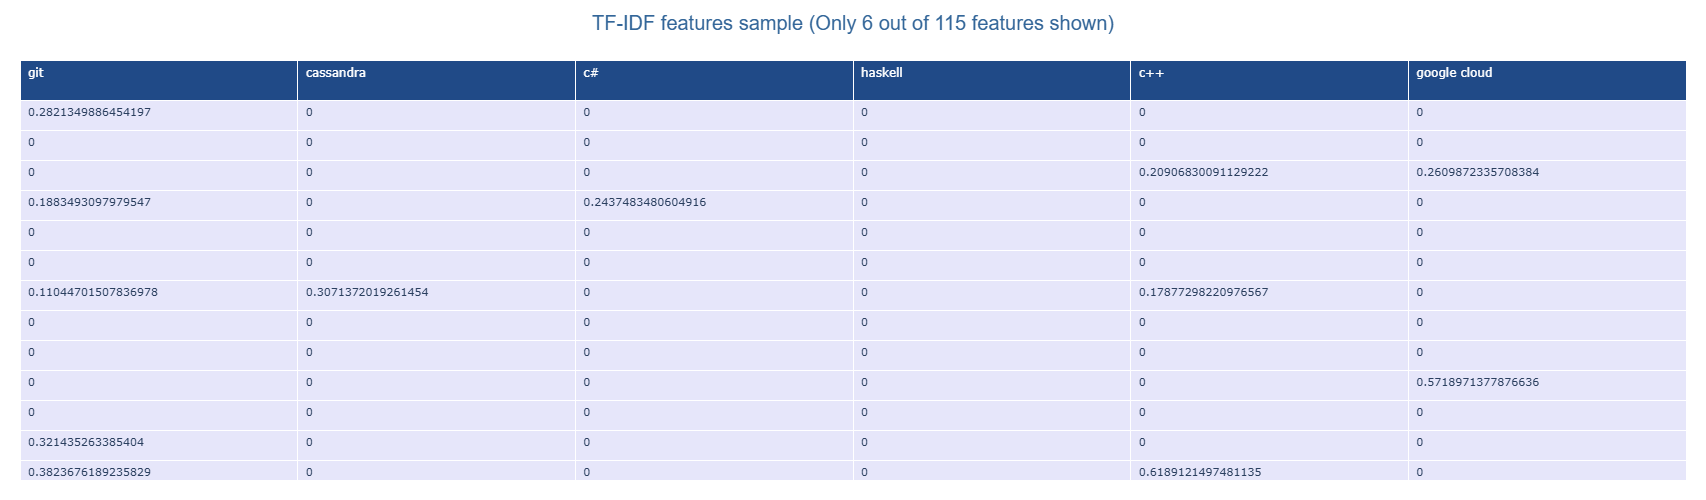

In [605]:
create_table(loaded_Xtfidf_header, 
             title='TF-IDF features sample (Only 6 out of 115 features shown)', 
             width=1300, 
             height=500
            #columnwidth=[10, 60]
)

TF-IDF Vectorizer Behavior can be describes as below:

* The TF-IDF vectorizer, when fitted on the training data (on X generating X_train_tfidf), creates a vocabulary based on all unique terms in that data.
* When transforming new data ((on X_testFinal generating X_test_tfidf)), it uses the same vocabulary.
* If the test data contains terms not seen in training, these are simply ignored.
* If the test data is missing terms from the training vocabulary, those features will have zero values.

## <span style="color: #336699;">4.6. Train/test Split</span>

Train-test split is a technique that divides a dataset into separate subsets for training and testing a machine learning model, allowing for unbiased evaluation of the model's performance on unseen data [Hastie2009].
In this study, the approach was a little bit more robust. 
The data was divided into training, validation, and test sets using stratified sampling:

* First split: 70% training + validation, 30% test.
* Second split: Further divides the training set into 70% training and 30% validation,
* The stratified sampling could be ignored because the targe variable is considerably balanced but it was still applied.

<span style="color: #336699;"><strong>Benefits</strong></span>:
* Preserves class distribution in all sets (stratify) [Sechidis2011]
* Provides separate validation set for model tuning
* Keeps a holdout test set for final evaluation [Raschka2018]
* Ensures reproducibility (random_state)
* This method allows for robust model development, tuning, and unbiased final performance assessment [Arlot2010].

In [610]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.3, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42, stratify=y_train
)

## <span style="color: #336699;"> 4.7. Features Importance and Model selection</span>

This approach implements a comprehensive <span style="color: #336699;"><strong>model evaluation</strong></span> and <span style="color: #336699;"><strong>feature selection</strong></span> pipeline for multiple machine learning models [Kuhn2013]. The key steps are:

* Define multiple models in a dictionary
* Create pipelines for each model, incorporating feature selection based on their importances using the <strong>SelectFromModel</strong></span> with a Decision Tree as the base estimator [Guyon2003].
* Perform 5-fold cross-validation for each model, evaluating multiple metrics (accuracy, precision, recall, F1 score) [Kohavi1995]. 
* Train each model on the full training set and evaluate on a separate validation set.
* Extract and store the selected features for each model.
* Print detailed performance metrics for both cross-validation and validation set results, as well as the number of selected features for each model.
* This approach allows for a systematic comparison of different models' performance while also implementing feature selection to potentially improve model efficiency and generalization [Chandrashekar2014].

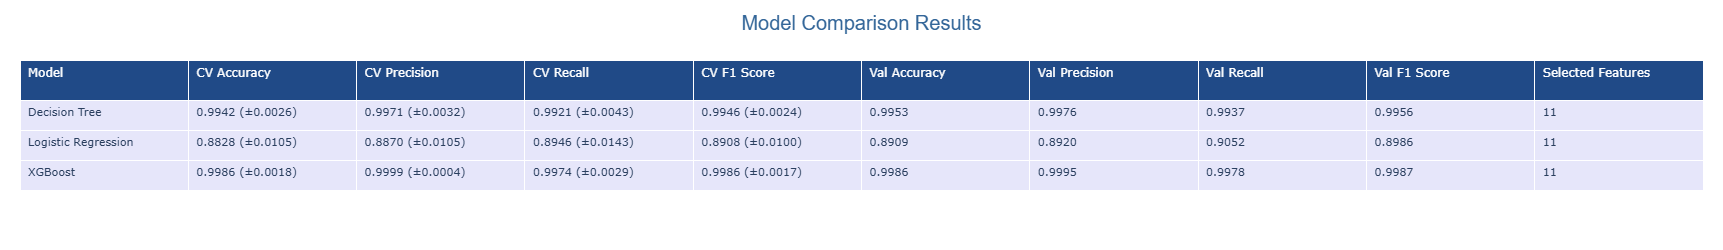

In [612]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Create pipelines
pipelines = {name: Pipeline([
    ('feature_selection', SelectFromModel(DecisionTreeClassifier(random_state=42), threshold='mean')),
    ('model', model)
]) for name, model in models.items()}

# Dictionary to store results
results = []
model_selected_features = {}
# Perform cross-validation and evaluation
for name, pipeline in pipelines.items():
    # Cross-validation
    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, 
                                scoring=['accuracy', 'precision', 'recall', 'f1'])
    
    # Train on full training set and evaluate on validation set
    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)
    
    # Get selected features
    selected_features = pipeline.named_steps['feature_selection'].get_support()
    selected_feature_names = X_train.columns[selected_features].tolist()
    model_selected_features[name] = selected_feature_names
    # Store results
    results.append({
        'Model': name,
        'CV Accuracy': f"{cv_results['test_accuracy'].mean():.4f} (±{cv_results['test_accuracy'].std() * 2:.4f})",
        'CV Precision': f"{cv_results['test_precision'].mean():.4f} (±{cv_results['test_precision'].std() * 2:.4f})",
        'CV Recall': f"{cv_results['test_recall'].mean():.4f} (±{cv_results['test_recall'].std() * 2:.4f})",
        'CV F1 Score': f"{cv_results['test_f1'].mean():.4f} (±{cv_results['test_f1'].std() * 2:.4f})",
        'Val Accuracy': f"{accuracy_score(y_val, y_val_pred):.4f}",
        'Val Precision': f"{precision_score(y_val, y_val_pred):.4f}",
        'Val Recall': f"{recall_score(y_val, y_val_pred):.4f}",
        'Val F1 Score': f"{f1_score(y_val, y_val_pred):.4f}",
        'Selected Features': len(selected_feature_names)
    })
results = pd.DataFrame(results)

create_table(results, 
             title='Model Comparison Results', 
             width=1000, 
             height=250)

In [619]:
X_trainNew = X_train[model_selected_features['Decision Tree']]
X_valNew = X_val[model_selected_features['Decision Tree']]
X_testNew = X_test[model_selected_features['Decision Tree']]
X_test_tfidf = X_test_tfidf[model_selected_features['Decision Tree']]

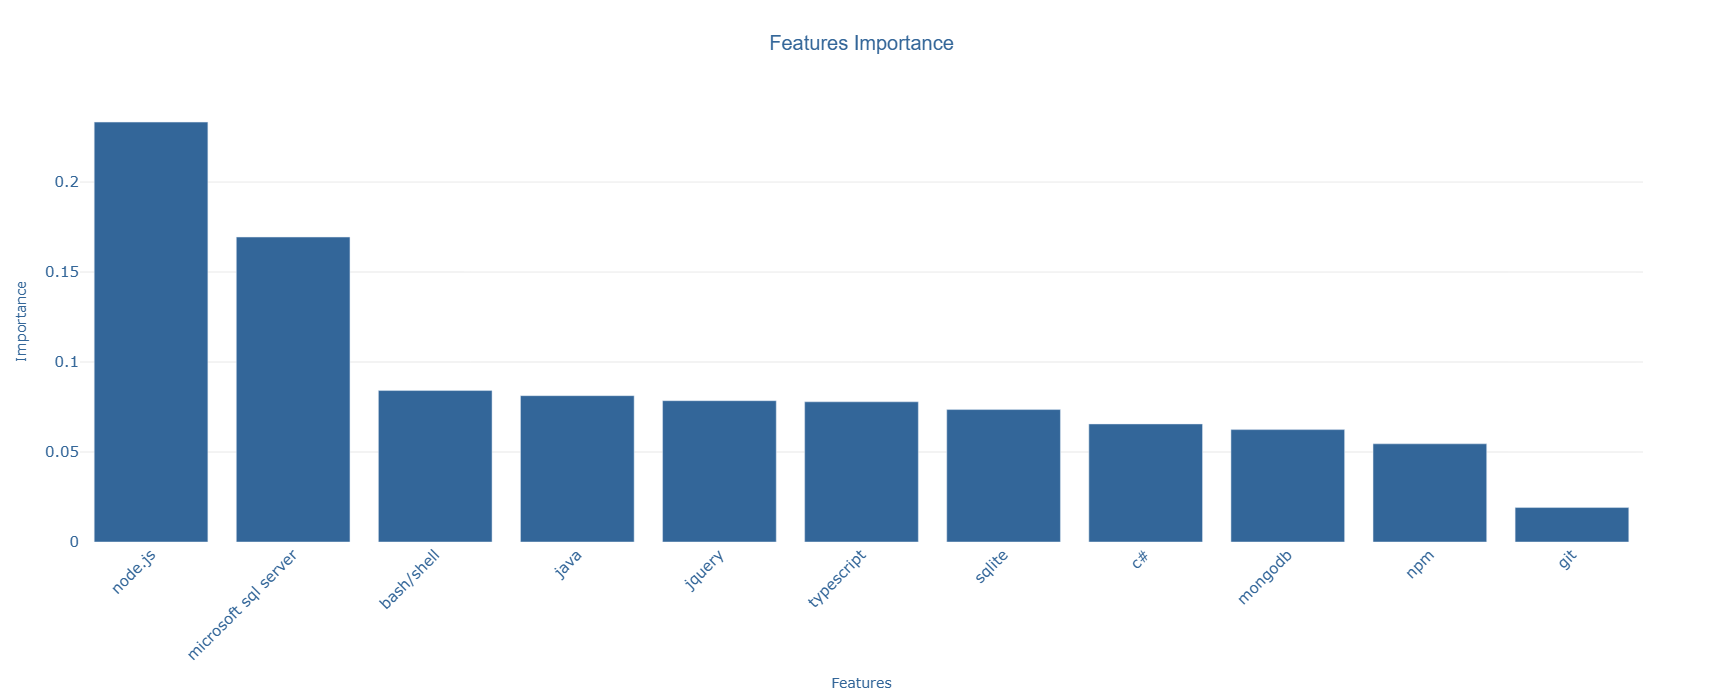

In [620]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_trainNew,y_train)
plot_feature_importances(model, X_trainNew,title = "Features Importance")

##### <span style="color: #336699;"> Conclusion</span>

1. After using feature selection based on their importance with a DecisionTreeClassifier there was a significant dimensionality reduction.
The method reduced the features set by approximately 90%, from 115 to 11 features.

Below the potential Benefits:

* Model Efficiency Improvements: Fewer features can lead to faster training and prediction times [Geron2019].
* Reduced Overfitting: A smaller feature set may help prevent overfitting, especially with smaller datasets [Hastie2009]. In this case the dataset isn't smal but is still beneficial.
* Increased Interpretability: With only 11 features, it's easier to understand and explain the model's decisions [Molnar2020].
* Feature Importance: The 11 selected features are likely the most influential in predicting the target variable, according to the decision tree's criteria [Breiman2001]. Although, since the reduction is significant, it's important to verify that model performance hasn't significantly decreased with the reduced feature set.

2. Given the strong performance of Decision tree, any improvements from ensemble methods like XGBoost might be marginal, although it could be a good choice too. Also, based on "Occam's Razor" principle in machine learning, which suggests that the simplest adequate solution is often the best [Domingos1999], a simpler model (like the Decision Tree in this case) have some advantages such:

* Interpretability: Easier to understand and explain.
* Computational Efficiency: Less resource-intensive to train and run [Ling2017].
* Reduced Overfitting: Lower risk of memorizing training data instead of generalizing [Hawkins2004].
* Easier Maintenance: Simpler to update and manage.
* Faster Deployment: Quicker to integrate into systems [Crankshaw2017].
* Sufficient Performance: Meets requirements without unnecessary complexity.

## <span style="color: #336699;">4.8. Pearson correlation between the new set of features</span>

After all the feature selection and model choosen, it would also be important to check the correlation between the features to check wich ones were independent of each other to avoid multicollinearity and redundancy that could increase the variance of coefficient estimates, making a potencial model unstable and causing overfitting. 
The Pearson correlation test is suitable for measuring linear relationships between continuous variables that are normally distributed [Schober2018].

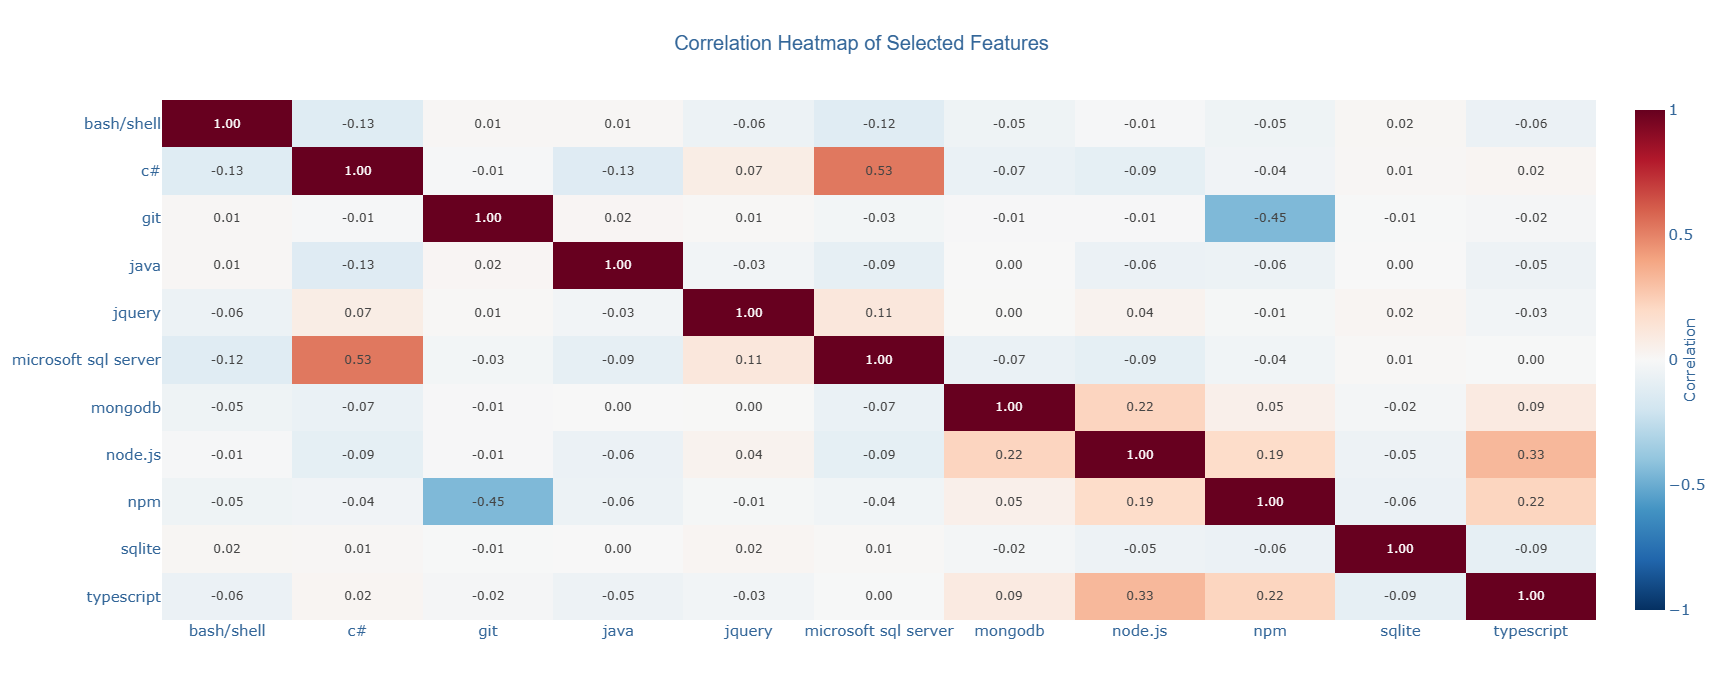

In [623]:
plot_correlation(X_trainNew, "Correlation Heatmap of Selected Features")

Based on the results of the Pearson correlation test, there is a slightly correlation between Microsoft SQL Server and C#, but is not very strong, even if is >50%, so it was decided to maintain both.

## <span style="color: #336699;">4.9. Correlation between numerical features</span>

Also a correlation between features and target variable would be advisable to check. Normally the test used is <span style="color: #336699;">point-biserial correlation coefficient (rpb)</span>
This test is a statistical measure used to assess the relationship between a continuous variable and a dichotomous variable [Schober2018]. It is a special case of the Pearson correlation coefficient, applied when one variable is continuous and the other is binary. In this particualry case, the test will check the correlation between each feature and the target variable "Employed".

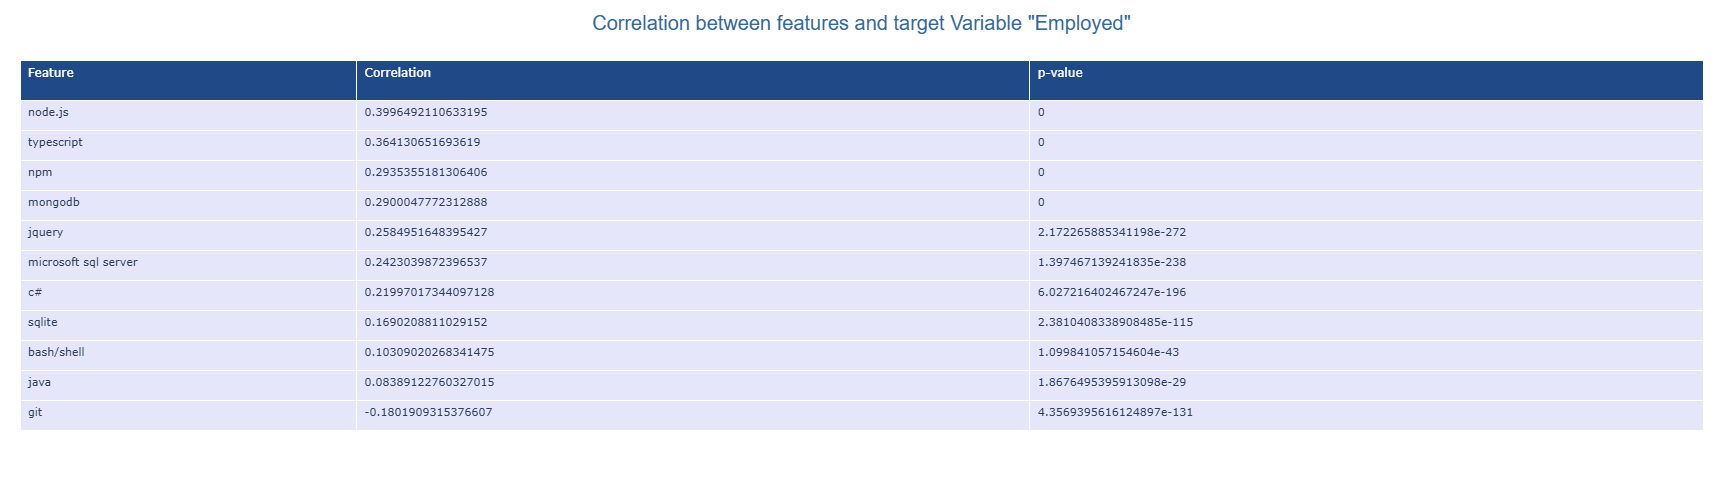

In [625]:
# Create a dictionary to store results
correlations = {}
# Loop through each feature in X_trainNew
for feature in X_trainNew.columns:
    corr, p_value = pointbiserialr(X_trainNew[feature], y_train)
    correlations[feature] = {'Correlation': corr, 'p-value': p_value}
# Convert to a DataFrame for better visualization
correlation_df = pd.DataFrame(correlations).T.sort_values(by='Correlation', ascending=False)
correlation_df = correlation_df.reset_index().rename(columns={'index': 'Feature'})

create_table(correlation_df, 
             title='Correlation between features and target Variable "Employed"', 
             width=1000, 
             height=500,
            columnwidth=[5,10,10])

The result is a full correlation between the features and the Target variable, so it was decided to maintain all the 11 features.

## <span style="color: #336699;">4.10. Hyperparameter Tuning</span>

<span style="color: #336699;">GridSearchCV</span> and <span style="color: #336699;">RandomizedSearchCV</span>
 are two popular methods for hyperparameter tuning in machine learning:

<span style="color: #336699;">GridSearchCV:</span>

* Exhaustively searches through a predefined set of hyperparameters
* Evaluates all possible combinations of hyperparameters
* Ideal for small hyperparameter spaces
* Computationally expensive for large parameter spaces
* Provides reproducible results

<span style="color: #336699;">RandomizedSearchCV:</span>

* Randomly samples a specified number of hyperparameter combinations
* More efficient for large hyperparameter spaces
* Can handle continuous and discrete parameters
* May miss the optimal combination but often finds good results faster
* Less computationally intensive than GridSearchCV

Both methods use cross-validation to evaluate model performance and select the best hyperparameters [Bergstra2012]. The choice between them depends on the size of the hyperparameter space, available computational resources, and the need for exhaustive search versus efficiency.

In this case, since the the train set is not small, having 11 features and the model arelady performing very well without tunning, it was decided to use <span style="color: #336699;">RandomizedSearchCV:</span> for the below reasons:

* Efficiency: Faster and less computationally expensive for large datasets.
* Effective Fine-Tuning: Explores a broader range of hyperparameters for potentially better performance.
* Scalable: Well-suited for models with many hyperparameters.
* Time-Saving: Provides good results more quickly than GridSearchCV.

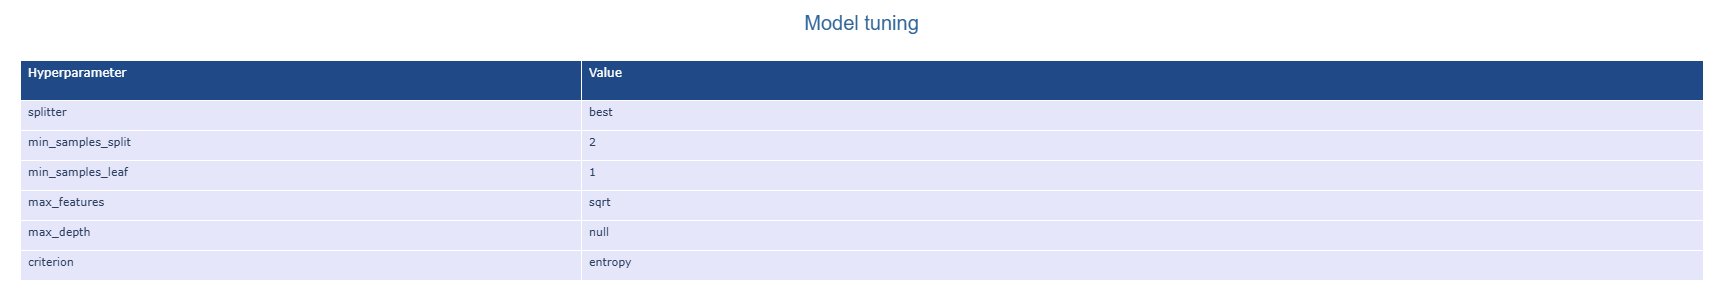

In [629]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

dt = RandomizedSearchCV(estimator = model, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

dt.fit(X_trainNew, y_train)
#print(dt.best_params_)
tuned_model = dt.best_estimator_
df = pd.DataFrame(list(dt.best_params_.items()), columns=['Hyperparameter', 'Value'])
save_dict = {
        'model_selected_features': model_selected_features,
        'performance_results': results,
        'HyperParameters': df
    }

    # Save the dictionary to a pickle file
with open('./JobApplicants/Transformations/model_selected_features.pkl', 'wb') as f:
    pickle.dump(save_dict, f)
create_table(df, 
             title='Model tuning', 
             width=500, 
             height=300,
             columnwidth=[5,10,10])

#### <span style="color: #336699;"> Tuning results</span> CHANGE

* 'splitter': 'best' -  indicates that the model performed better by choosing the optimal split at each node, leading to improved classification accuracy
* 'min_samples_split': 2 - The minimum number of samples required to split an internal node.
* 'min_samples_leaf': 1 - The minimum number of samples required to be at a leaf node.
* 'max_features': 'sqrt' - The number of features to consider when looking for the best split is $\sqrt{n}$, where n is the number of features.
* 'max_depth': null - The maximum depth of the tree can grow to their full depth without any restrictions.
* 'criterion': 'entropy' - The function to measure the quality of a split is the information gain (entropy).

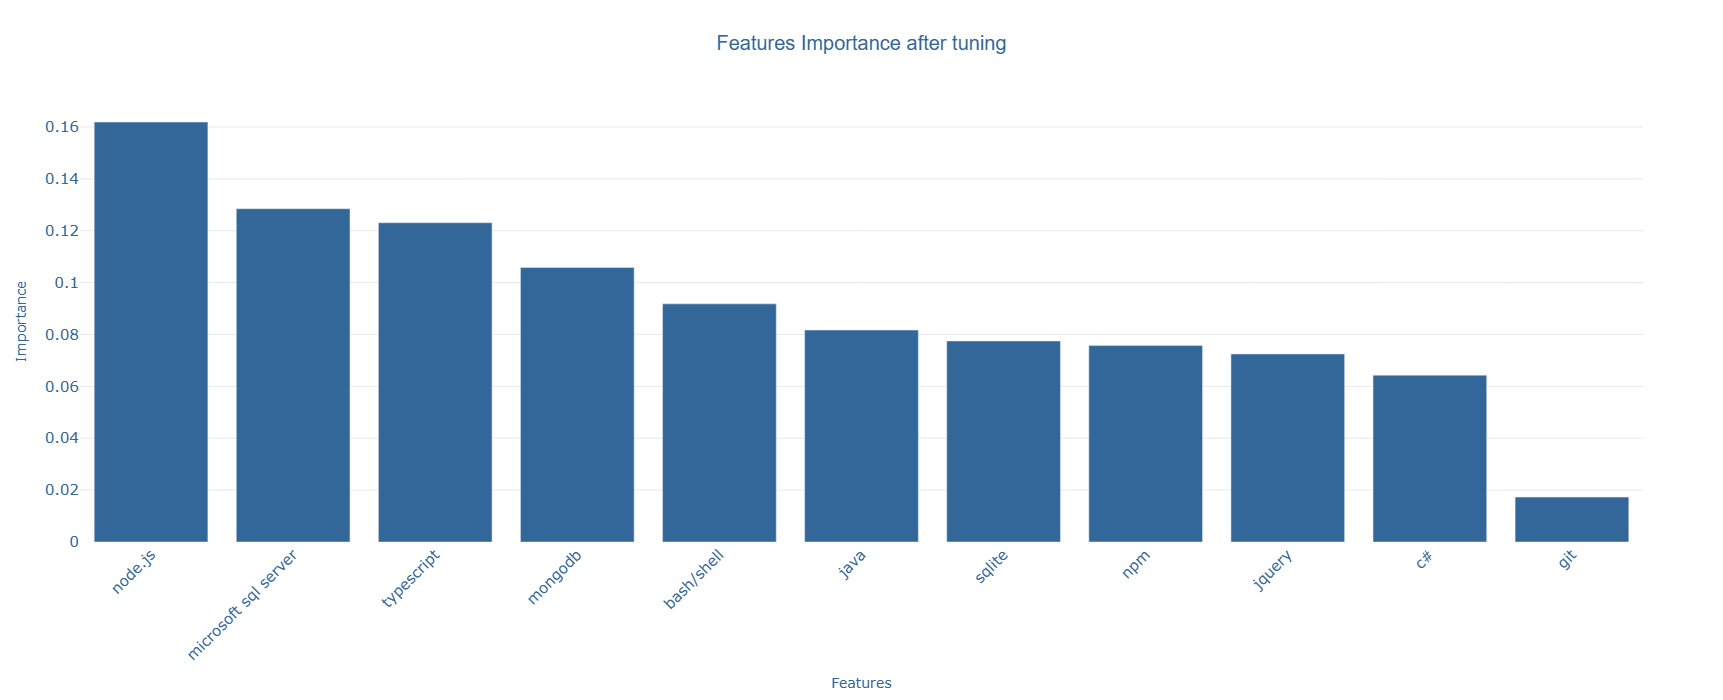

In [631]:
plot_feature_importances(tuned_model, X_trainNew,title = "Features Importance after tuning")

## <span style="color: #336699;">4.11. Learning Curve</span>
Learning curves provide a visual representation of a model's performance as the amount of training data increases. This approach offers several key insights:
* Model Learning: It shows how well the model learns from increasing amounts of data.
* Bias-Variance Trade-off: The curves help identify if the model is suffering from high bias (underfitting) or high variance (overfitting).
* Data Sufficiency: They indicate whether more data might improve model performance or if the model has reached its learning capacity.
* Convergence: The curves show if and when the model's performance stabilizes with increasing data.
* Generalization: By comparing training and validation scores, it reveals the model's ability to generalize to unseen data.
* This approach is valuable for model selection, hyperparameter tuning, and determining if collecting more data would be beneficial for improving model performance.

In [517]:
train_sizes, train_scores, test_scores = learning_curve(tuned_model, X_trainNew, y_train, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

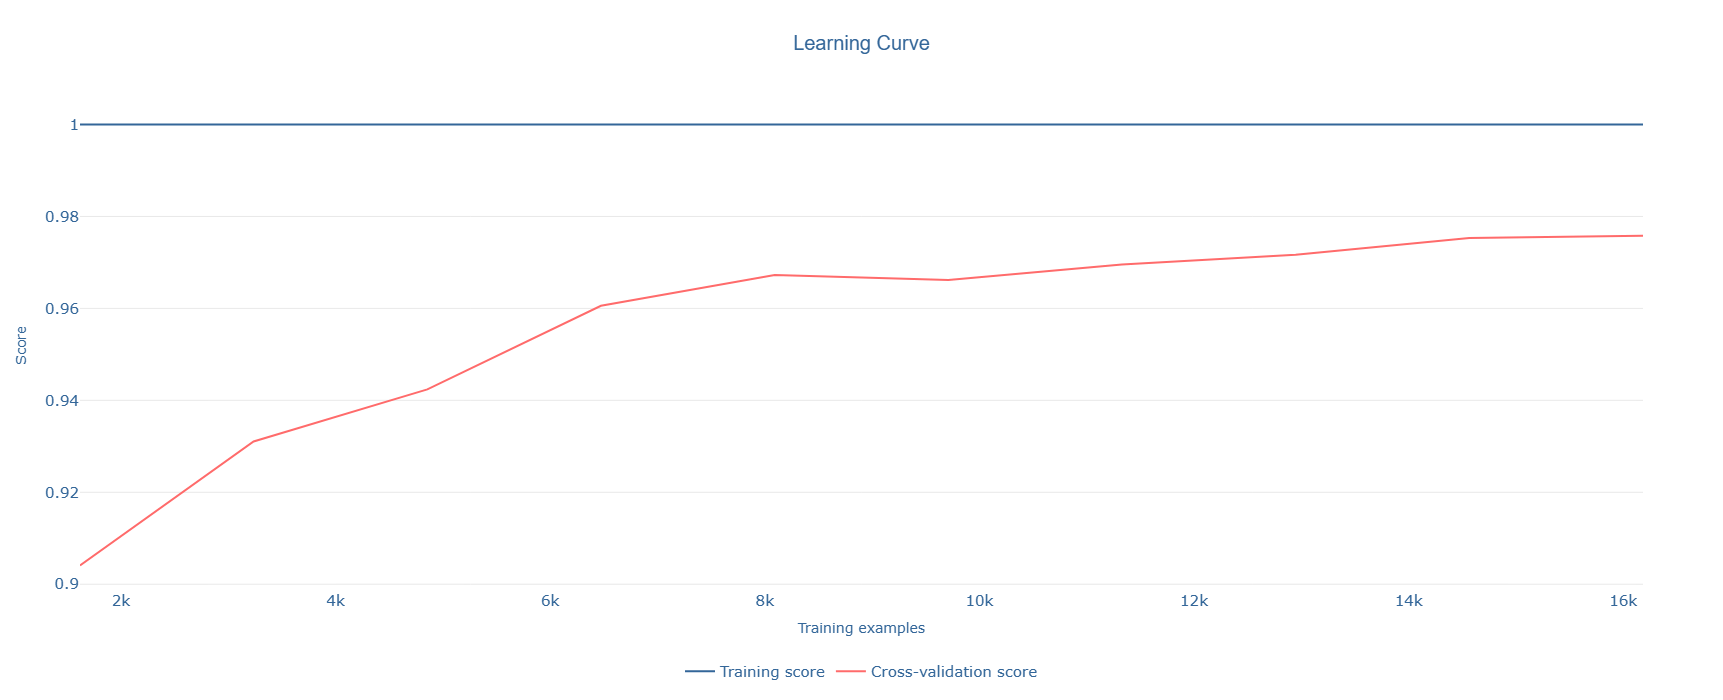

In [520]:
plot_learning_curve(train_sizes, train_scores_mean, test_scores_mean,title = "Learning Curve")

In this learning curve analysis, the dataset was divided into 10 equal parts or "folds" (cv=10). Below the main points to consider:

* The model is trained on 4 folds and tested on the remaining fold.
* This process is repeated 5 times, with each fold serving as the test set once.
* Predictions are made for each sample when it's in the test fold.

This approach ensures that every sample is used for both training and testing, providing a robust estimate of the model's performance on unseen data
The increase in cross-validation score from 0.9 to 0.97 indicates a significant improvement in the model's ability to generalize to unseen data, suggesting better overall performance and reduced overfitting [Taylor2025].

## <span style="color: #336699;"> 4.12. Confusion matrix</span>
A <span style="color: #336699;">confusion matrix</span> can b e described as a table that evaluates the classification model's performance. It shows correct and incorrect predictions, helping to identify where the model succeeds and struggles, and calculate performance metrics like accuracy and precision [Boughorbel2017].
This matrix helps assess how well a model distinguishes between different classes by showing:

* Correct predictions (diagonal elements)
* Types of errors made (off-diagonal elements)

This analysis is particularly useful for:
* Identifying specific areas where the model struggles
* Evaluating performance on imbalanced datasets
* Calculating various performance metrics like accuracy, precision, recall, and F1-score7

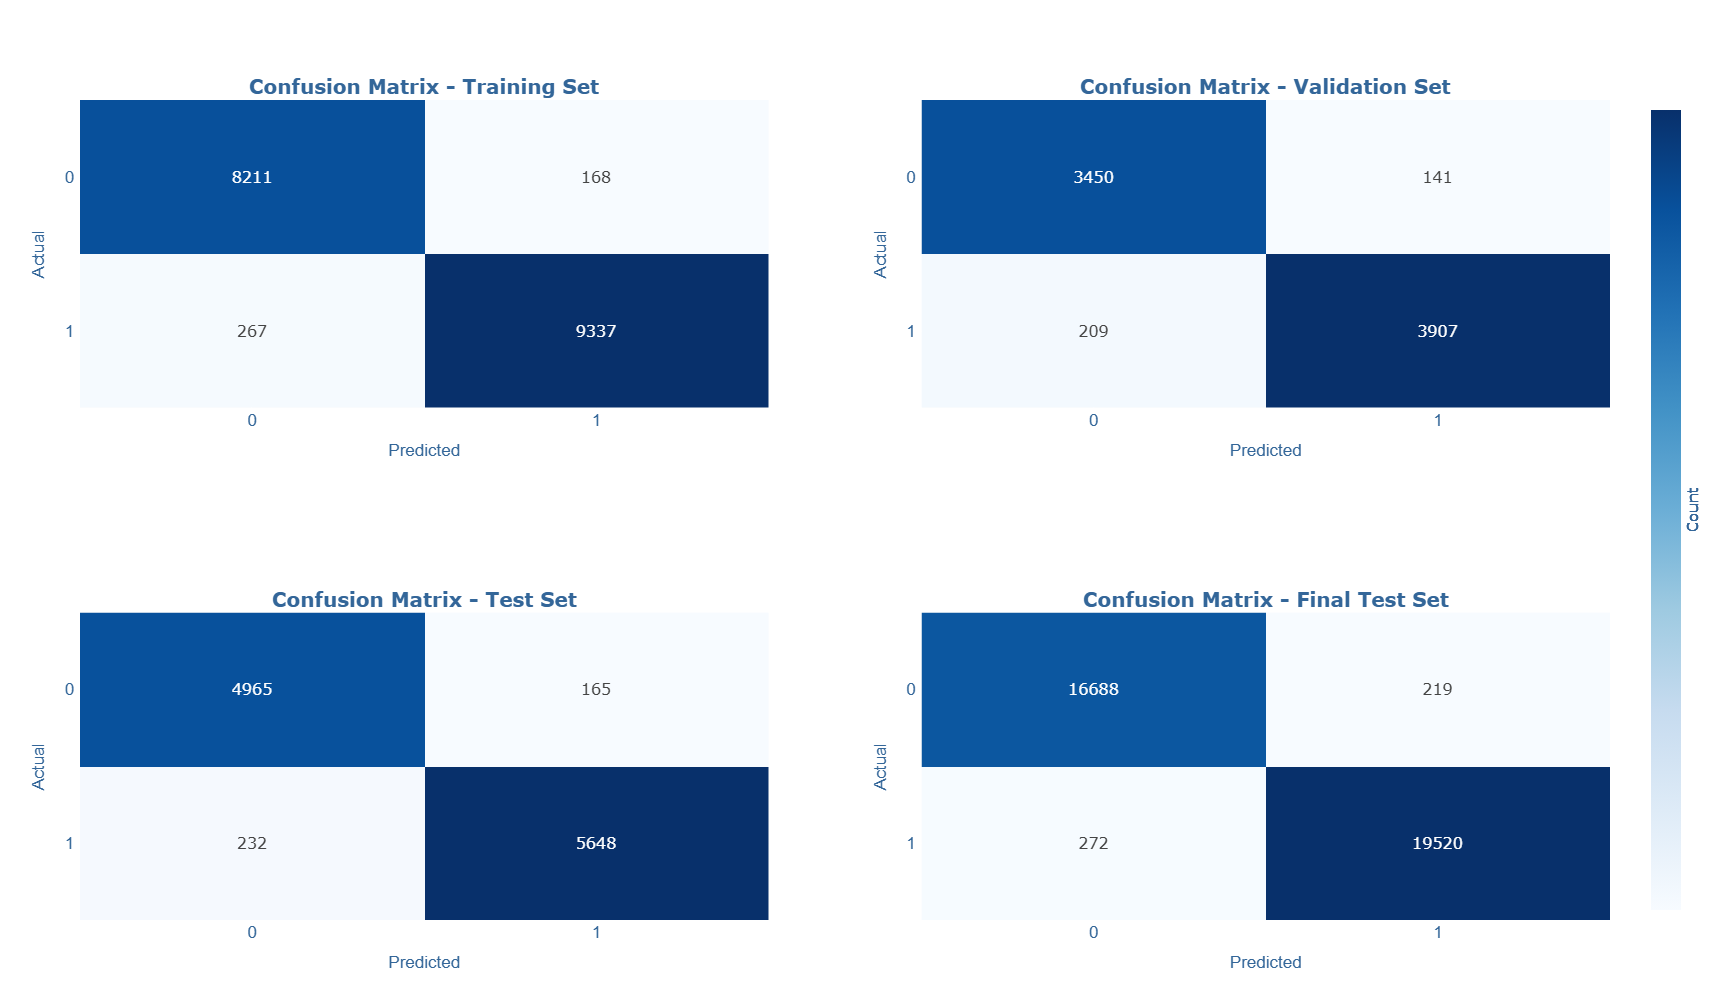

In [523]:
# For training set
y_pred_train_cv = cross_val_predict(tuned_model, X_trainNew, y_train, cv=10)
# For validation set
y_pred_val_cv = cross_val_predict(tuned_model, X_valNew, y_val, cv=10)
# For test set
y_pred_test_cv = cross_val_predict(tuned_model, X_testNew, y_test, cv=10)
# For final test set
y_pred_testFinal_cv = cross_val_predict(tuned_model, X_test_tfidf, y_testFinal, cv=10)

compare_confusion_matrixes(
    (y_train, y_pred_train_cv), "Confusion Matrix - Training Set",
    (y_val, y_pred_val_cv), "Confusion Matrix - Validation Set",
    (y_test, y_pred_test_cv), "Confusion Matrix - Test Set",
    (y_testFinal, y_pred_testFinal_cv), "Confusion Matrix - Final Test Set"
)

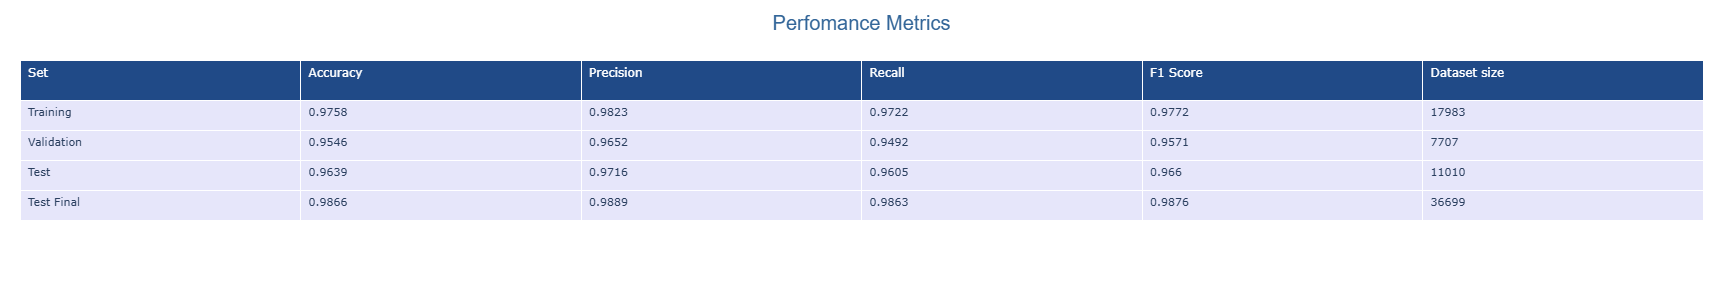

In [525]:
def calculate_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'Dataset size': len(y_true)
    }

# Calculate metrics for all sets
sets = {
    'Training': (y_train, y_pred_train_cv),
    'Validation': (y_val, y_pred_val_cv),
    'Test': (y_test, y_pred_test_cv),
    'Test Final': (y_testFinal, y_pred_testFinal_cv)
}

all_metrics = {name: calculate_metrics(y_true, y_pred) for name, (y_true, y_pred) in sets.items()}

# Create DataFrame
df_metrics = pd.DataFrame(all_metrics).T  # Transpose to have metrics as columns
df_metrics = df_metrics.round(4)  # Round to 4 decimal places
df_metrics = df_metrics.reset_index().rename(columns={'index': 'Set'})
# Display the DataFrame
create_table(df_metrics,'Perfomance Metrics',
             width=500, 
             height=300,
             columnwidth=[5,5,5,5,5,5])

Based on the analyisis of the most common perfomance metrics, the results are: 

Training set:
* High accuracy (97.95%) and balanced precision/recall, indicating good fit.
* Low false positives and negatives.

Validation set:
* Slight performance drop (95.06% accuracy), which could suggest a slight overfitting, however, based on the validation set size (7707), is more likely due to its smaller size rather than overfitting.
* Still maintains good balance between precision and recall.

Test set:
* Performance improves (96.53% accuracy) compared to validation.
* Indicates good generalization to unseen data.

Final Test set:
* Best performance (98.58% accuracy), suggesting excellent generalization.
* Very high and balanced precision/recall.

Overall, the model performs consistently well across all sets, with slight variations. The improvement in the final test set suggests the model generalizes exceptionally well to new, unseen data.



## <span style="color: #336699;"> 4.13. Precision-Recall Curve</span>

A Precision-Recall Curve is a graphical tool used to evaluate the performance of binary classification models, especially useful for imbalanced datasets (not the case but still useful). It visualizes the trade-off between precision (the proportion of true positive predictions out of all positive predictions) and recall (the proportion of true positives identified out of all actual positives) across different classification thresholds.

In [527]:
def calculate_precision_recall(tuned_model, X, y, cv=5):
    # Generate predictions
    y_scores = cross_val_predict(tuned_model, X, y, cv=cv, method='predict_proba')[:, 1]
    
    # Calculate precision, recall, and average precision
    precision, recall, _ = precision_recall_curve(y, y_scores)
    average_precision = average_precision_score(y, y_scores)
    
    return y_scores,precision, recall, average_precision

y_scores,precision_test, recall_test, average_precision_test = calculate_precision_recall(tuned_model, X_testNew,y_test,cv=10)

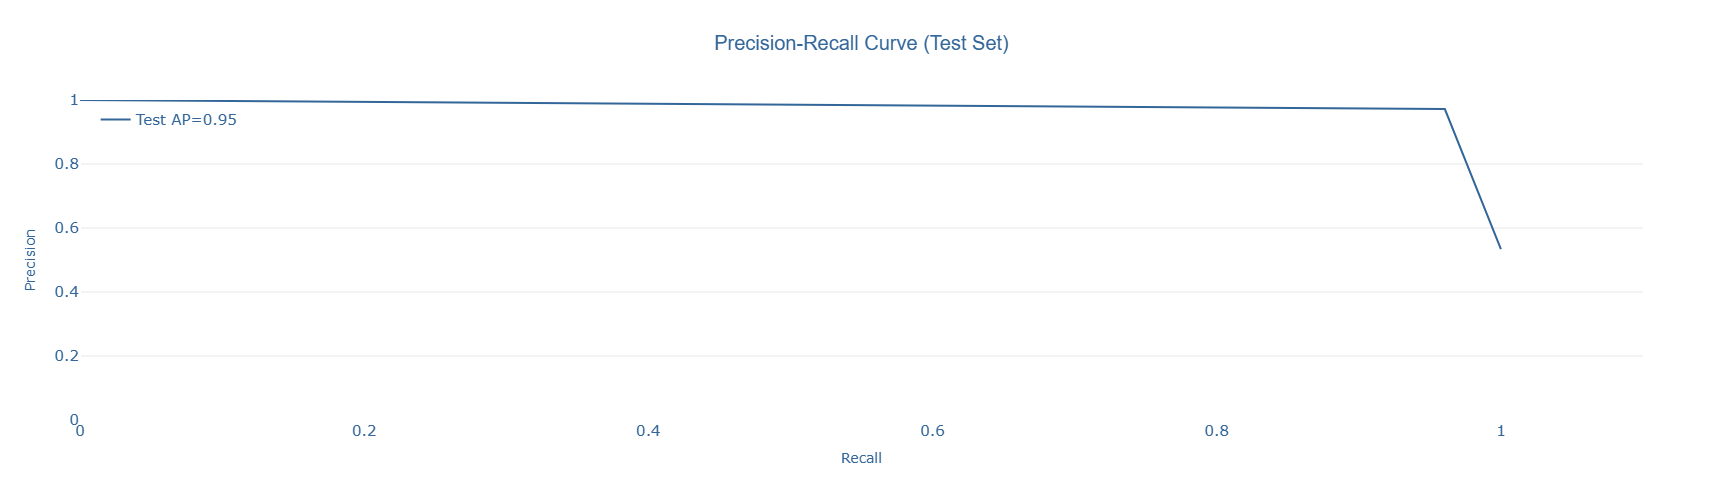

In [529]:
plot_precision_recall_curve(precision_test, recall_test, average_precision_test)

The precision-recall curve indicates a strong performance of the model.

* Average Precision:
    * The average precision score is 0.9544, reflecting good discrimination ability across different thresholds. 
* Precision and Recall Points:
    * Perfect Precision: Achieved at one threshold with a score of 1.0, but this results in very low recall (0.0).
    * Perfect Recall: Reached at another point with a recall score of 1.0, accompanied by moderate precision (0.5341).
* Balanced Trade-off:
    * A middle point shows precision of 0.9716 and recall of 0.9605, indicating a well-balanced trade-off between precision and recall.

Conclusion: The model effectively identifies true positives while maintaining a low false positive rate for a significant range of thresholds.

## <span style="color: #336699;"> 4.14.  ROC Curve and AUC</span>
The Receiver Operating Characteristic (ROC) curve visualizes a binary classifier's performance by plotting the True Positive Rate against the False Positive Rate, while the Area Under the Curve (AUC) quantifies this performance, with values closer to 1.0 indicating better classification accuracy.

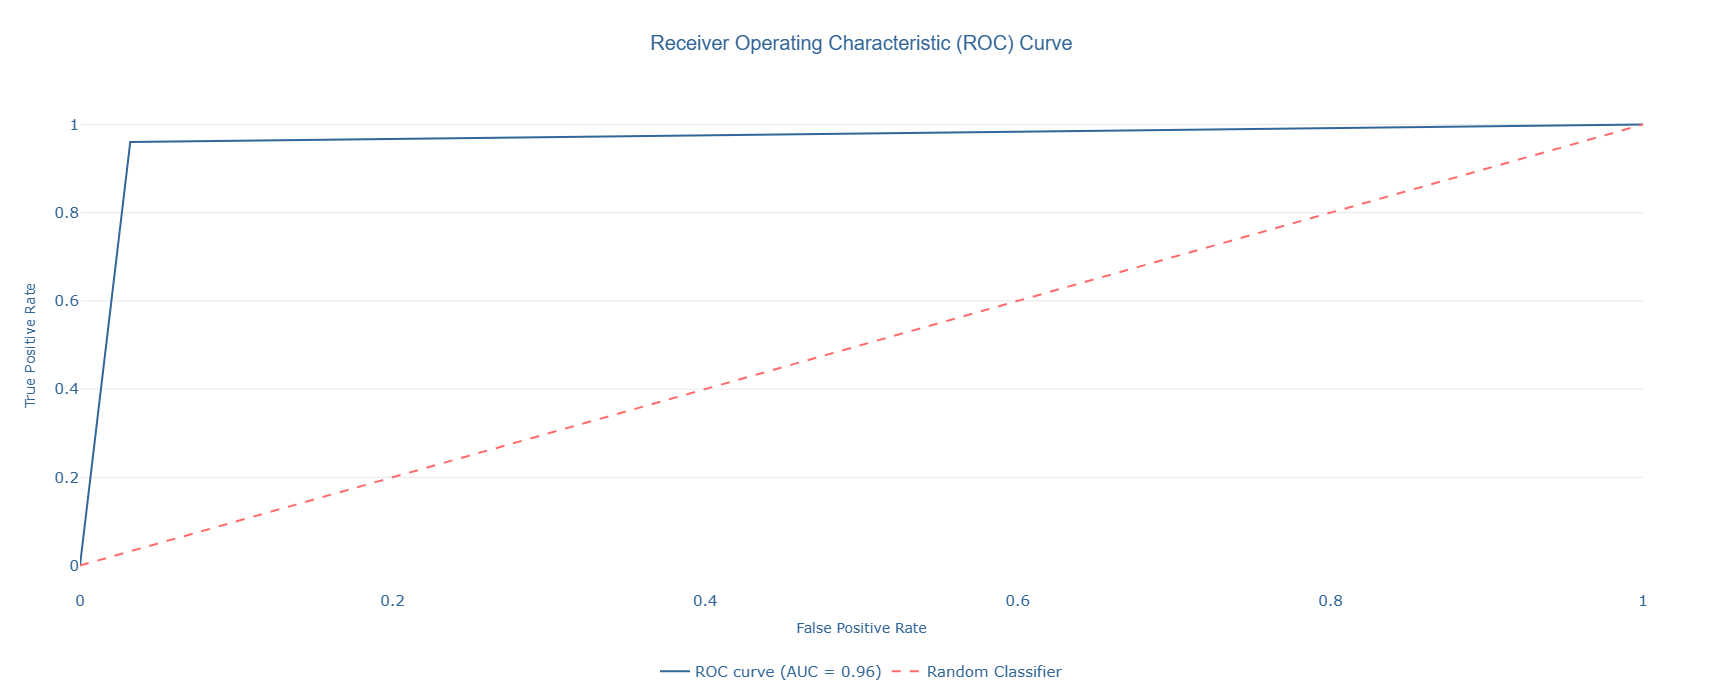

In [575]:
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc)

The results of ROC (AUC) curve reinforces the strong perfomance of the model.
ROC AUC Score:
* The Area Under the Receiver Operating Characteristic curve (ROC AUC) is 0.9642.
* This high score indicates excellent model performance.

False Positive Rate (FPR):
* Ranges from 0 to 1, with an intermediate point at 0.0322.
* Suggests the model has a low false positive rate at certain thresholds.

True Positive Rate (TPR):
* Also ranges from 0 to 1, with a notable point at 0.9605.
* Indicates high sensitivity (recall) at some thresholds.

Model Discrimination:
* The high AUC score suggests the model effectively distinguishes between classes.

Threshold Trade-offs:
* The intermediate points (FPR: 0.0322, TPR: 0.9605) show a good balance between false positives and true positives.

Overall Conclusion:
* The model demonstrates strong predictive power with high accuracy in classification tasks.
* It maintains a good balance between identifying positive cases and avoiding false alarms.

## <span style="color: #336699;"> 4.15. Conclusion</span>
 
The combination of sophisticated text processing, feature selection, and model tuning resulted in a high-performing text classification model.
This approach showcases the power of combining multiple machine learning techniques to tackle complex text analysis tasks.

Potential for Further Application:

* Given its strong performance, this methodology could be valuable for similar text classification problems or as a baseline for more advanced NLP (Natural Language Processing) tasks.

## <span style="color: #336699;"> 5. References</span>


[Molnar2020] Molnar, C. (2020). Interpretable machine learning. Lulu. com.

[Breiman2001] Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32.

[Geron2019] Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly Media.

[Hastie2009] Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer Science & Business Media.

[Sechidis2011] Sechidis, K., Tsoumakas, G., & Vlahavas, I. (2011). On the stratification of multi-label data. In Machine Learning and Knowledge Discovery in Databases, 145-158.

[Raschka2018] Raschka, S. (2018). Model Evaluation, Model Selection, and Algorithm Selection in Machine Learning. arXiv preprint arXiv:1811.12808.

[Arlot2010] Arlot, S., & Celisse, A. (2010). A survey of cross-validation procedures for model selection. Statistics Surveys, 4, 40-79.

[Domingos1999] Domingos, P. (1999). The role of Occam's razor in knowledge discovery. Data Mining and Knowledge Discovery, 3(4), 409-425.

[Ling2017] Ling, C. X., & Sheng, V. S. (2017). Cost-sensitive learning. Encyclopedia of Machine Learning and Data Mining, 1-11.

[Hawkins2004] Hawkins, D. M. (2004). The problem of overfitting. Journal of Chemical Information and Computer Sciences, 44(1), 1-12.

[Crankshaw2017] Crankshaw, D., et al. (2017). The missing piece in complex analytics: Low latency, scalable model management and serving with Velox. CIDR.

[Kuhn2013] Kuhn, M., & Johnson, K. (2013). Applied Predictive Modeling. Springer.

[Guyon2003] Guyon, I., & Elisseeff, A. (2003). An introduction to variable and feature selection. Journal of Machine Learning Research, 3, 1157-1182.

[Kohavi1995] Kohavi, R. (1995). A study of cross-validation and bootstrap for accuracy estimation and model selection. In Proceedings of the 14th International Joint Conference on Artificial Intelligence, 1137-1143.

[Chandrashekar2014] Chandrashekar, G., & Sahin, F. (2014). A survey on feature selection methods. Computers & Electrical Engineering, 40(1), 16-28.

[Wikipedia2005] Point-biserial correlation coefficient. (2005, November 27). In Wikipedia. Retrieved February 17, 2025, from https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient

[Schober2018] Schober, P., Boer, C., & Schwarte, L. A. (2018). Correlation Coefficients: Appropriate Use and Interpretation. PubMed. Retrieved February 17, 2025, from https://pubmed.ncbi.nlm.nih.gov/29481436/

[Bergstra2012] Bergstra, J., & Bengio, Y. (2012). Random search for hyper-parameter optimization. Journal of Machine Learning Research, 13(Feb), 281-305.

[Brownlee2020] Brownlee, J. (2020). ROC Curves and Precision-Recall Curves for Imbalanced Classification. Machine Learning Mastery

[Brownlee2020] Boughorbel, S., Jarray, F. & El-Anbari, M. Optimal classifier for imbalanced data using Matthews Correlation Coefficient metric. PLoS ONE 12, e0177678 (2017)

[Taylor2025] Taylor & Francis. (n.d.). Cross validation – Knowledge and References. Retrieved February 17, 2025, from https://taylorandfrancis.com/knowledge/Medicine_and_healthcare/Pharmaceutical_medicine/Cross_validation/

In [736]:
Xentry = X_testFinal.iloc[0:2,:]
#Xentry='Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;'
if type(Xentry)==str:
    Xentry = pd.DataFrame({'HaveWorkedWith': [Xentry]})
XentryTFIDF = transformer.transform(Xentry)
XentryTFIDF = pd.DataFrame(XentryTFIDF.toarray(), columns=feature_names, index=Xentry.index)
XentryTFIDF= XentryTFIDF[model_selected_features['Decision Tree']]
model.predict(XentryTFIDF)

array([1, 0], dtype=int64)

In [635]:
save_dict = {
        'tuned_model': tuned_model,
        'X_trainNew': X_trainNew,
        'y_train': y_train,
        'X_valNew': X_valNew,
        'y_val': y_val,
        'X_testNew': X_testNew,
        'y_test': y_test,
        'X_test_tfidf': X_test_tfidf,
        'y_testFinal': y_testFinal,
        'train_sizes': train_sizes,
        'train_scores_mean': train_scores_mean,
        'test_scores_mean': test_scores_mean,
        'df_metrics' : df_metrics,
        'y_scores': y_scores,
        'precision_test': precision_test, 
        'recall_test': recall_test, 
        'average_precision_test': average_precision_test
    }
    # Save the dictionary to a pickle file
with open('./JobApplicants/Transformations/model_tuning.pkl', 'wb') as f:
    pickle.dump(save_dict, f)